# Plotting

The next step in exploratory data analysis is plotting. Let's go through the world's fastest introduction to the core plotting library in Python, **matplotlib**.

We are going to look briefly at some of the underlying concepts in matplotlib to aid in orientation. Having a mental model of how matplotlib works will greatly aid your ability to unlock the power of matplotlib. That said, one of the best ways to make great plots and to customize matplotlib is to go to the [gallery](https://matplotlib.org/gallery.html), find a plot that you want to emulate, and read the code. Another recent but great resource is the [python graph gallery](https://python-graph-gallery.com/).

There are two interfaces available when working with matplotlib -- an interactive interface and an object-oriented interface. Both are available through the `matplotlib.pyplot` namespace.

When working interactively, matplotlib maintains a global state for your current plot.

First, let's set some Notebook display options. For more information on this, check [here](http://ipython.readthedocs.io/en/stable/interactive/plotting.html).

In [1]:
%matplotlib inline

This is the canonical import for matplotlib.

In [2]:
import matplotlib.pyplot as plt

Now, let's use the interactive interface.

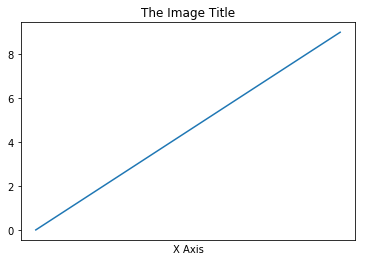

In [3]:
plt.plot(range(10), range(10))

plt.xlabel("X Axis")
plt.xticks([])
plt.title("The Image Title");

I don't *really* recommend using the interactive interface in practice or for anything serious. 

Alternatively, you can use the object-oriented interface. This usually entails a call to **plt.subplots**.

This call returns instances of two objects -- a Figure object and an Axes object. Understanding the [anatomy of a matplotlib plot](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure) and these two underlying concepts will help unlock the power of **matplotlib**.

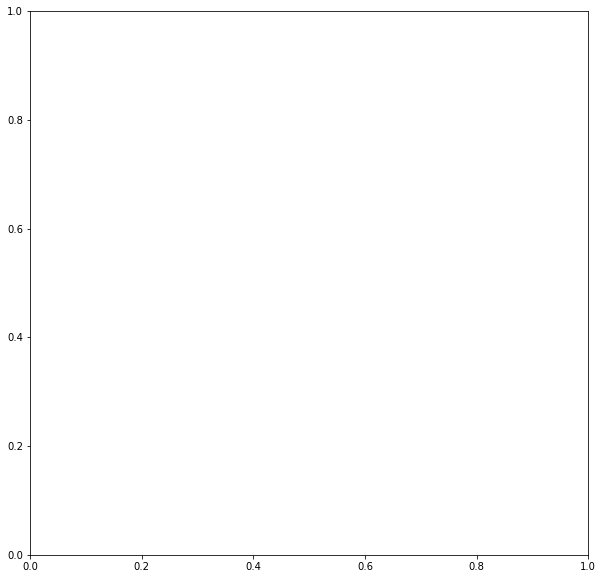

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

The Figure is the object that contains the Axes. To be concrete, we'll turn the figure color gray.

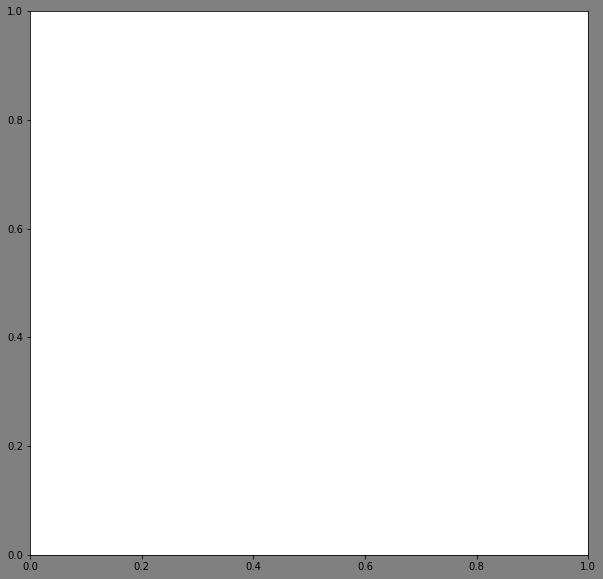

In [5]:
fig.set_facecolor('gray')
fig

The Axes contain the plot.

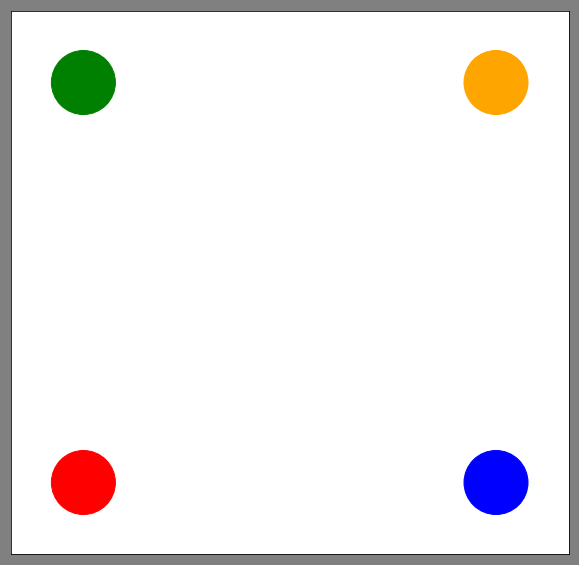

In [6]:
ax.scatter(
    (.25, .25, .75, .75), (.25, .75, .25, .75), 
    s=64**2,
    c=['red', 'green', 'blue', 'orange']
)

ax.set_xticks([])
ax.set_yticks([])

fig

A Figure can contain multiple Axes.

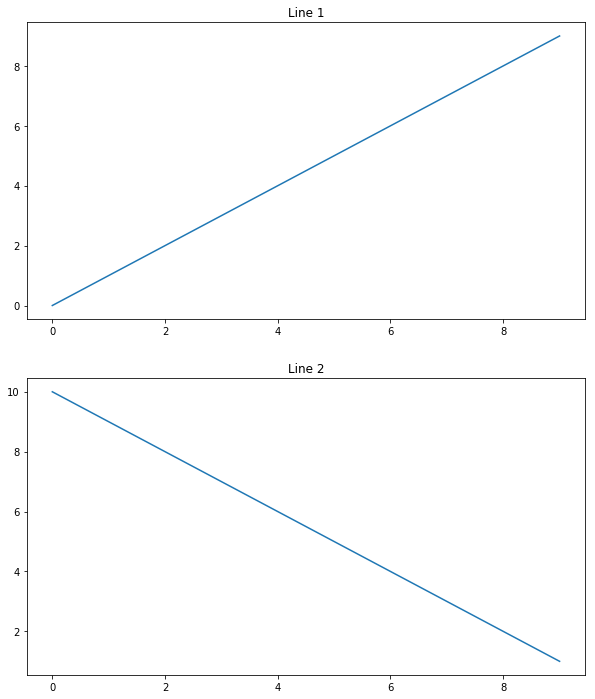

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

axes[0].plot(range(10), range(10))
axes[1].plot(range(10), range(10, 0, -1))

axes[0].set_title("Line 1")
axes[1].set_title("Line 2")

## High-Level Plotting

One of the reasons that this abstraction and the distinction between figures and axes can be useful is in understanding how to operate with some higher-level plotting libraries like **pandas** and **seaborn**.

Pandas itself has a plotting API that utilizes matplotlib under the hood. Let's take a look at some of this functionality using the canonical Titanic dataset with information on passenger survival in this famous shipwreck.

In [8]:
import pandas as pd

titanic = pd.read_csv("data/titanic.csv")

Distribution of categorical variables:

In [20]:
titanic.select_dtypes('object').describe()

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


Distribution of numeric variables:

In [18]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [17]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


As we know, bar plots can be useful for displaying and comparing measurable quantities, such as counts or volumes. Let's say we want to make a bar plot of the number of survivors by the class of their ticket. 

Pandas provides access to all of the plotting functionality through the **DataFrame.plot** attribute. The plot attribute is exposed on GroupBy objects as well. Here, we'll group by the class of the ticket and then call `...plot.bar` to get a nice bar plot.

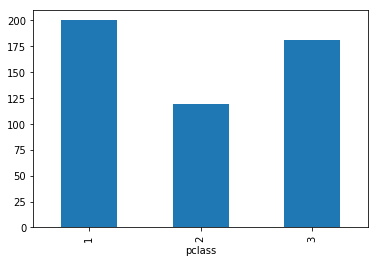

In [9]:
ax = (titanic.groupby('pclass')
      .survived.sum()
      .plot.bar())

Notice that pandas returned to us the matplotlib axes. We could go on and customize these axes should we so desire. Let's rotate **tick labels**, for example.

Note that each axes holds a reference to the figure, which we use to display in the notebook.

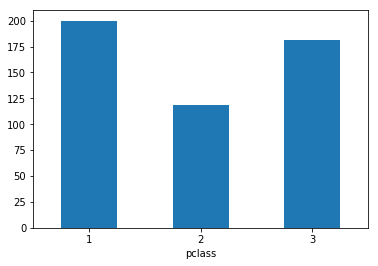

In [10]:
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(0)
    
ax.figure

We can also use this pattern to plot multiple things on an axes using a mix of pure matplotlib and higher-level plotting packages.

This plot is a little small. One trick I like to use is explicitly passing in an axes that I have already created. 

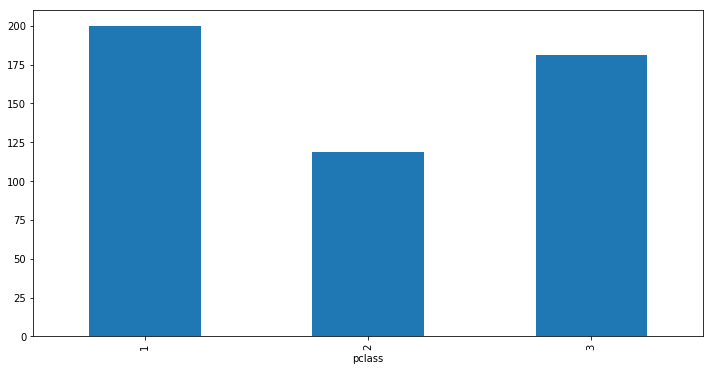

In [13]:
fig, axes = plt.subplots(figsize=(12, 6))

ax = (titanic.groupby('pclass')
      .survived.sum()
      .plot.bar(ax=axes))

Then we might want to make the tick and axes labels bigger. We could do this by munging the axes or we could take advantage of the matplotlib style **context manager** (note: recall the terminology).

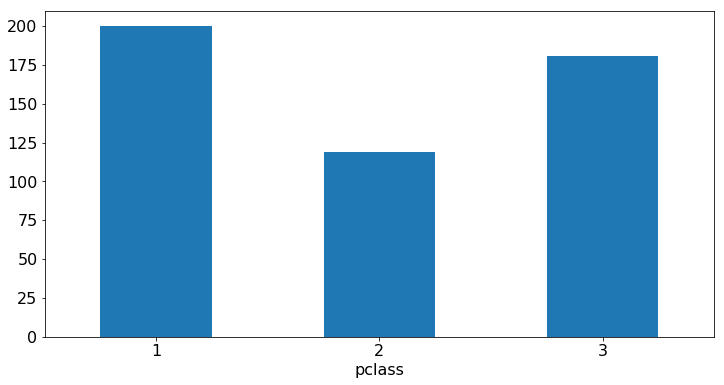

In [14]:
font_config = {
    'font.size': 16,
}

with plt.style.context(font_config):
    fig, axes = plt.subplots(figsize=(12, 6))

    ax = (titanic.groupby('pclass')
          .survived.sum()
          .plot.bar(ax=axes))
    
    for tick in ax.xaxis.get_ticklabels():
        tick.set_rotation(0)

You can also set matplotlib style state globally using the `rc` function. See here for more information. TODO: add link.

In [15]:
plt.rc('font', size=16)

There are a few more interesting bar plots we can make using pandas. We might want to see the number of survivors broken down with class by gender, and plot it as a horizontal bar chart.

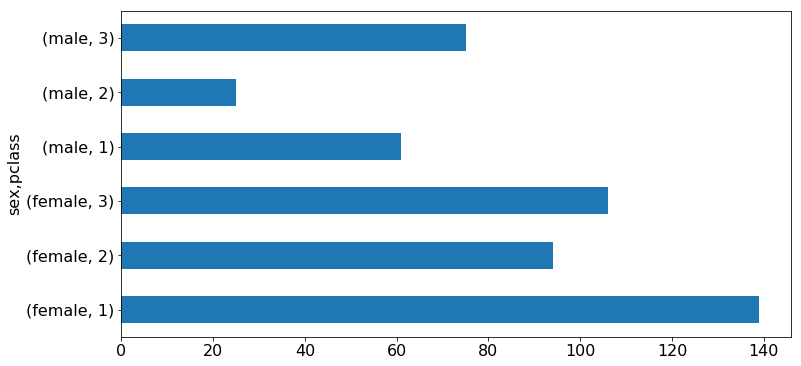

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = (titanic.groupby(['sex', 'pclass'])
      .survived.sum().plot.barh(ax=ax))

We can look use a cross-tab of the those who did and did not survive by class and gender to make a stacked bar chart, which is a little more economical.

In [21]:
# note crosstab is a quick way to get subgroup count than pd.groupby.size...
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts

survived       False  True 
pclass sex                 
1      female      5    139
       male      118     61
2      female     12     94
       male      146     25
3      female    110    106
       male      418     75

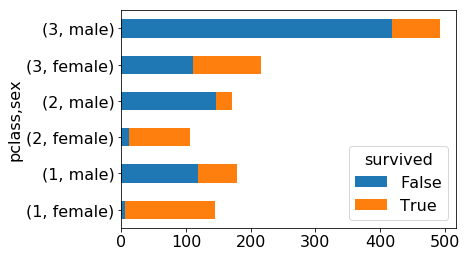

In [22]:
ax = death_counts.plot.barh(stacked=True) 

We can also look at the survival *rate* of the groups, by adjusting for the number of people in each group.

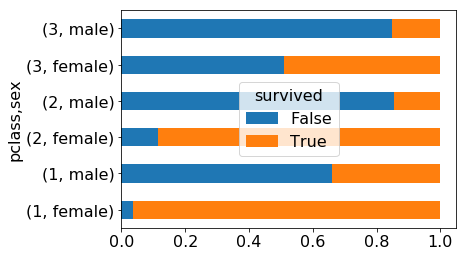

In [23]:
ax = (death_counts.div(death_counts.sum(1), axis=0)
      .plot.barh(stacked=True))

This, obviously, isn't quite what we want for the legend. We might Consider increasing the margin at the bottom and making the legend horizontal. Let's go ahead and clean up the labels too.

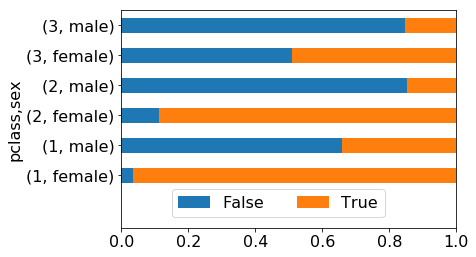

In [24]:
ax = (death_counts.div(death_counts.sum(1), axis=0)
      .plot.barh(stacked=True))

ax.margins(x=0)
ax.set_ylim(-1.75, 5.5)

ax.legend(loc=(.15, .05), ncol=2)

## Health Inspection Data

Let's take a look back at the Chicago Health Inspection data.

In [25]:
from load_data import dta

In [26]:
dta = dta.drop(["violations"], axis='columns').join(
    dta.violations.str.split("|", expand=True)
        .unstack()
        .dropna()
        .str.strip()
        .reset_index(level=0, drop=True)
        .to_frame()
        .rename(columns={0: 'violations'}),
    how='right'
)

One thing we may wonder is if the violations are fairly evenly distributed or if some are much more common than others.

In [27]:
violation_num = dta.violations.str.extract("(\d+)(?=\.)", expand=False).astype(int)

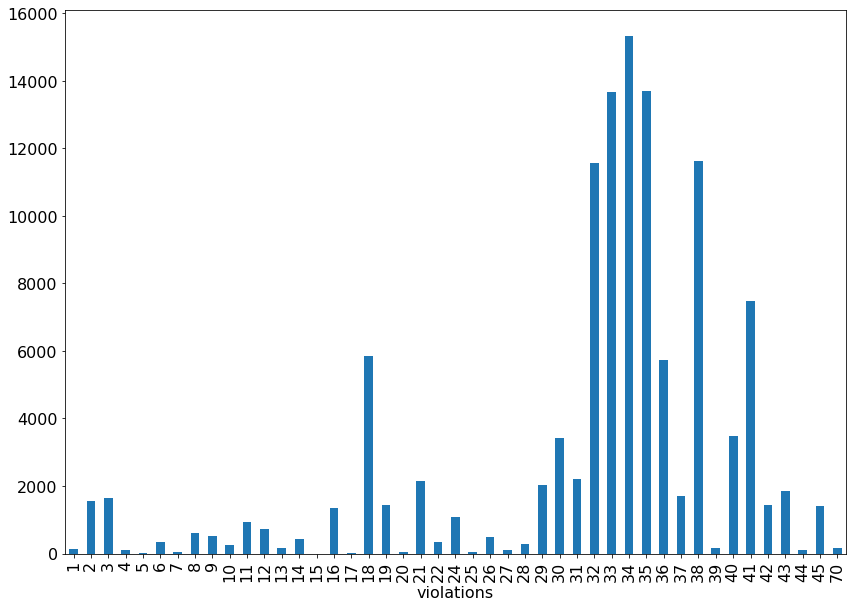

In [28]:
fig, ax = plt.subplots(figsize=(14, 10))

ax = violation_num.groupby(violation_num).size().plot.bar(ax=ax)

### Exercise:

See if there are any meaningful differences in the number of violations by quarter. Recall that you can use the `dt` accessor for datetime functionality on a Series.

In [ ]:
%load solutions/violation_by_quarter.py

## Plotting Geographic Data

One the most interesting features that we have here are geographical. There are a few options for plotting maps in Python (and in Notebooks).

The first thing we can try is plotting with matplotlib only. If you don't need much else, this can work really well to get a sense of how things are, if your data are sufficiently dense.

In [29]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117723 entries, 44249 to 2102275
Data columns (total 15 columns):
address            117723 non-null object
aka_name           116415 non-null object
city               117670 non-null object
dba_name           117723 non-null object
facility_type      117638 non-null category
inspection_date    117723 non-null datetime64[ns]
inspection_type    117723 non-null category
latitude           117356 non-null float64
license_           117714 non-null float64
longitude          117356 non-null float64
results            117723 non-null category
risk               117721 non-null category
state              117703 non-null object
zip                117694 non-null object
violations         117723 non-null object
dtypes: category(4), datetime64[ns](1), float64(3), object(7)
memory usage: 13.9+ MB


In [30]:
dta = dta.dropna(subset=["latitude", "longitude"])

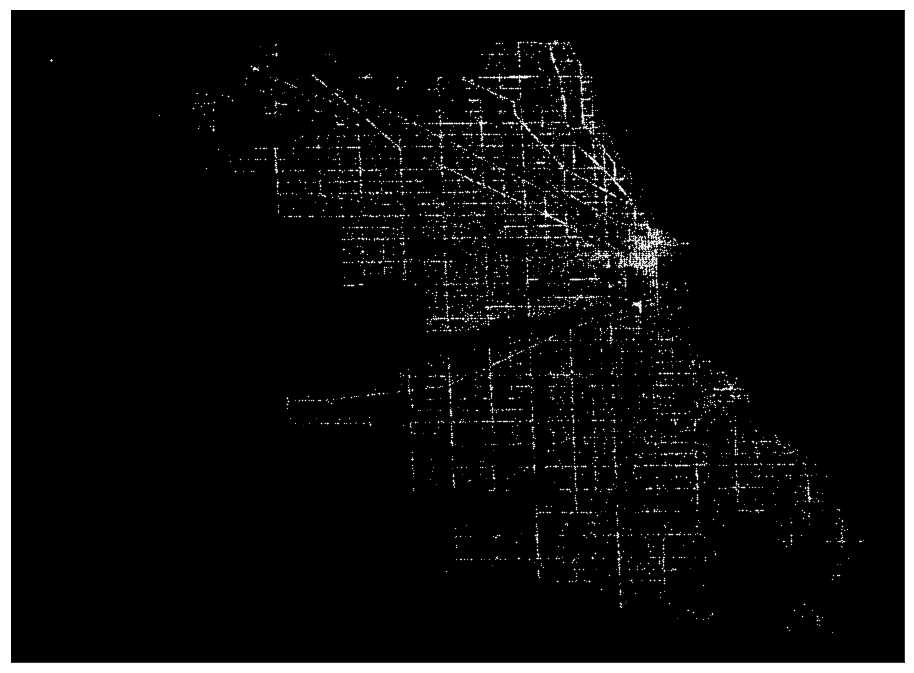

In [31]:
with plt.style.context({
    'axes.facecolor': 'black',
   }):
    fig, ax = plt.subplots(figsize=(16, 12))

    ax = dta.plot.scatter(x='longitude', y='latitude', color='white', s=.02, alpha=.6, ax=ax)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])

A few things to note. First, we used a context manager again to set some style that we know we wanted to adhere to. Second, we used the `DataFrame.plot.scatter` method.

Suppose we thought there may be some geographic clustering to the restaurant incident reporting.

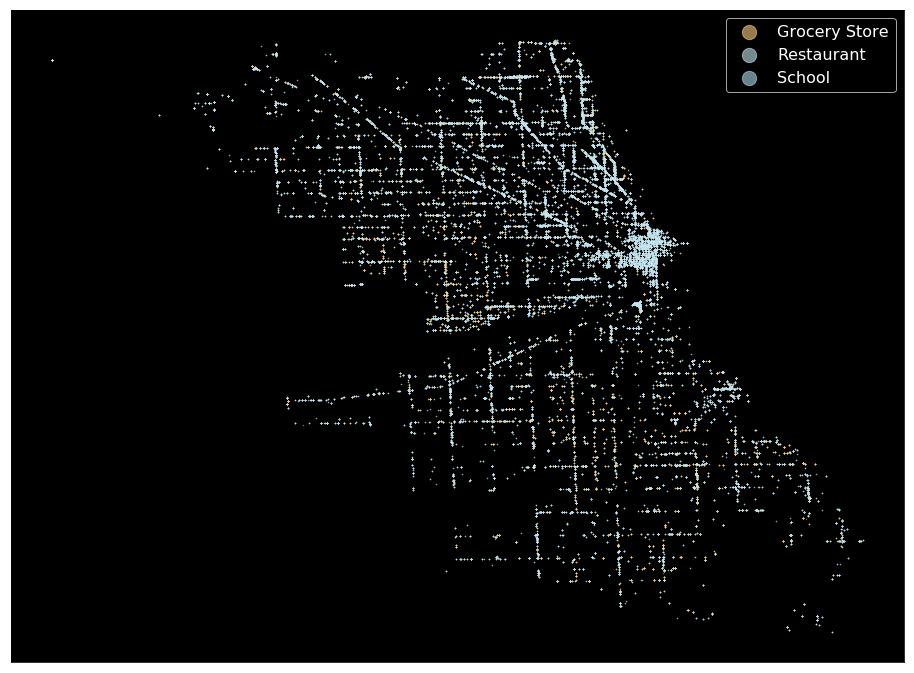

In [32]:
cmap = plt.cm.get_cmap('RdYlBu')


with plt.style.context({
    'axes.facecolor': 'black',
    'legend.facecolor': 'inherit',
    'legend.markerscale': 32,
    'text.color': 'white',
   }):
    fig, ax = plt.subplots(figsize=(16, 12))

    grouper = dta.groupby('facility_type')
    for i, (name, group) in enumerate(grouper):
        if len(group) < 5000:
            continue
        ax = group.plot.scatter(x='longitude', y='latitude', s=.2, color=cmap(i), alpha=.6, ax=ax, label=name)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend()

Here we attempt to uncover some more detail from our map, by plotting the different types of estbalishments using different colors. We use matplotlib's **color maps** under the `plt.cmap` namespace to do this. We also add a **legend** and style it. In general, you use the `label` argument to add a name to plot element and the call `legend` on the axes to display it.

Incidentally, the matplotlib documentation has a [fantastic page](https://matplotlib.org/users/colormaps.html) about choosing color maps purposefully for different situations.

For some more fine-grained control over maps, you may want to check out packages like [cartopy](http://scitools.org.uk/cartopy/), [folium](http://python-visualization.github.io/folium/), and [bqplot](https://github.com/bloomberg/bqplot).